## Openpyxl

Openpyxl is a Python library used for reading, writing, and modifying Excel files

Data Manipulation – Read data from Excel sheets, modify cell values, and write new data.

Formatting – Change font styles, cell colors, borders, and alignment.

Formulas – Work with Excel formulas within cells.

Charts and Graphs – Create and modify charts.

Pivot Tables – Work with pivot tables.

Handling Multiple Sheets – Create, read, and modify multiple sheets in a workbook

In [2]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

Loading the online retail data from uci

In [4]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-18 22:08:15--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  30.9MB/s    in 0.7s    

2025-02-18 22:08:16 (30.9 MB/s) - ‘online+retail.zip’ saved [23715478]



In [5]:
!unzip online+retail.zip


Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [6]:
df1 = pd.read_excel("Online Retail.xlsx")
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


I want to change the object datatype to string.

In [8]:
df1 = df1.astype({'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})

# we can use this simple code to convert all object dtype to string using
# df1.astype(str)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [10]:
df1.shape

(541909, 8)

## Data Cleaning


### Dealing with missing values

In [11]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


We have missing values in "Description", "CustomerID" columns.

In [12]:
df1[df1['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


So we can observe that the mostly if the description is Not Available correspondingly CustomerID is NAN.

So lets deal them individually.

In [13]:
#Top 5 NA values in Description column
df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Now lets check the rows of each stockcode

In [14]:
df1[df1.StockCode=="22139"].shape

(993, 8)

So we have 993 rows with stockcode 22139 and lets see the nullvalues of that stockcode

In [15]:
df1[df1["StockCode"] == "22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


We can observe that fro "22139" stock code the most repeated "Description" is "RETROSPOT TEA SET CERAMIC 11 PC"

In [16]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


Now lets create another dataframe with stockcode and description columns

In [17]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [18]:
most_freq[most_freq.StockCode=="22139"]

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988
4256,22139,amazon,1


Lets take the decription with highest count. To do that we can use groupby() function.

In [19]:
most_freq = most_freq.groupby("StockCode").head(1)

In [20]:
most_freq.head(10)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
5,84879,ASSORTED COLOUR BIRD ORNAMENT,1501
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,21212,PACK OF 72 RETROSPOT CAKE CASES,1385
8,20727,LUNCH BAG BLACK SKULL.,1350
9,22457,NATURAL SLATE HEART CHALKBOARD,1280


So we can observe that each stock code is having unique description.

In [21]:
most_freq[most_freq.StockCode=="22139"]

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988


In [22]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
most_freq.head(3)
# changing the column names of the dataframe

,StockCode,freq_Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159


Lets perform left join fro df1 and most_freq tables

In [23]:
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


Non lets replace NAN values of Decription column with freq_description value

In [24]:
df2['Description'] = df2['Description'].mask(df2['Description'].isnull(), df2['freq_Description'])
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


Still we have null values in Description column which means there are StockCode values without description. So lets drop those stockcodes which have no use.

In [25]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


We can Ignore the null values in CustomerID because for the sales transaction it has no impact to predict the sales.

it is ok to have null values in CustomerID column

In [26]:
df2.drop(columns = ["freq_Description", "count"], inplace=True)

In [27]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Handling Invalid values

In [28]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


We can observe that we have negative values in the columns Quantity and UnitPrice. we couldnot have negative values in these.

In [29]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [30]:
df2[df2.UnitPrice<0].shape

(2, 8)

I am assuming that these values are entered by mistake.

we can drop these columns with negative values.

And I got another idea where we can convert the value to positive value so that there will not be any data loss.

df2['Quantity'] = df2['Quantity'].abs()

So we can use abs function to do that but as of now lets create a separate table with positive values


In [31]:
df3 = df2[(df2['Quantity'] > 0) & (df2['UnitPrice'] > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


### Feature Engineering

In [32]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Creating a New column

Total sales amount for each transaction

By creating this feature we can estimate the sales of each item.

In [35]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Lets create one more feature which is year

In [36]:

df4['Year'] = df4['InvoiceDate'].dt.year
df4.sample(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year
201768,554323,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-05-23 15:33:00,1.69,16729.0,United Kingdom,27.04,2011
389858,570488,22966,GINGERBREAD MAN COOKIE CUTTER,1,2011-10-10 17:12:00,2.46,14096.0,United Kingdom,2.46,2011
522555,580402,23314,VINTAGE CHRISTMAS TABLECLOTH,2,2011-12-04 11:55:00,12.50,13536.0,United Kingdom,25.00,2011
288189,562141,22606,WOODEN SKITTLES GARDEN SET,6,2011-08-03 10:12:00,12.75,17389.0,United Kingdom,76.50,2011
207299,554982,47590A,BLUE HAPPY BIRTHDAY BUNTING,120,2011-05-29 12:16:00,4.65,17152.0,United Kingdom,558.00,2011
39413,539642,22149,FELTCRAFT 6 FLOWER FRIENDS,2,2010-12-20 15:35:00,2.10,15867.0,United Kingdom,4.20,2010


### Data Visualization

In [37]:
yearly_sales = df4.groupby('Year')['TotalSales'].sum()
yearly_sales

,TotalSales
Year,
2010,823746.140
2011,9842938.404


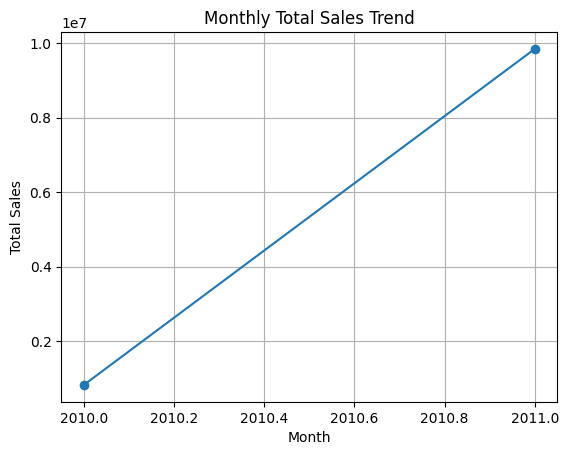

In [39]:
yearly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

We can observe that the sales got increased gradually

In [40]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month
515024,579777,23200,JUMBO BAG PEARS,2,2011-11-30 15:13:00,4.13,NaN,United Kingdom,8.26,2011,11
369021,569008,23250,VINTAGE RED TRIM ENAMEL BOWL,12,2011-09-29 18:53:00,1.25,15114.0,United Kingdom,15.00,2011,9


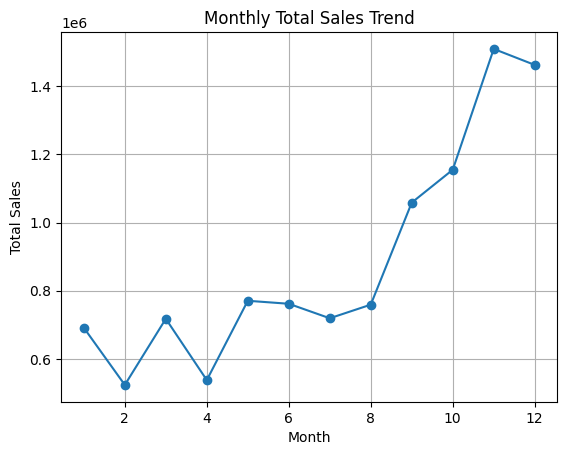

In [43]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

we can observe that Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year